In [24]:
using CARMA
using PyPlot
using PyCall

push!(LOAD_PATH, "../code")
using Aldebaran
using Periodogram

@pyimport seaborn as sns

sns.set_context("notebook")
sns.set_style("ticks")
sns.set_palette("colorblind")

In [26]:
ts, ys, dys = Aldebaran.load_timeseries();

In [27]:
ys_highpass = []
dys_highpass = []
for (t, y, dy) in zip(ts, ys, dys)
    ylp, dylp = LowPass.exp_lowpass(t, y, dy, 2)
    push!(ys_highpass, y-ylp)
    push!(dys_highpass, sqrt.(dy.*dy + dylp.*dylp))
end

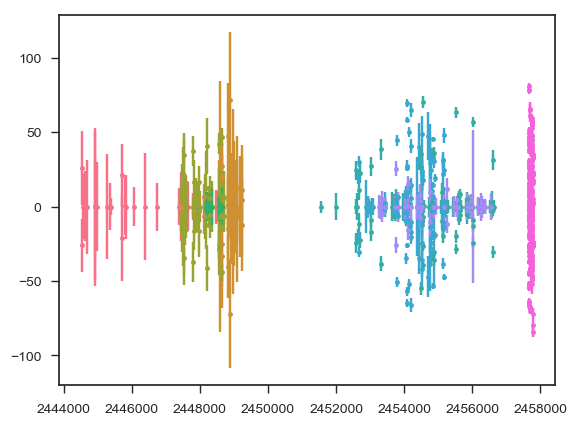

In [28]:
cs = sns.color_palette("husl", length(ys_highpass))
for (i, (t, y, dy)) in enumerate(zip(ts, ys_highpass, dys_highpass))
    errorbar(t, y, dy, fmt=".", color=cs[i])
end

In [32]:
muHz = 1.0/11.57
fs = collect(1*muHz:0.01*muHz:5*muHz)
T = max([maximum(t) for t in ts]...) - min([minimum(t) for t in ts]...)
fpeaks2 = Periodogram.basis_pursuit_pgram(ts, ys_highpass, dys_highpass, fs, 1.5/T, 2)
fpeaks3 = Periodogram.basis_pursuit_pgram(ts, ys_highpass, dys_highpass, fs, 1.5/T, 3)
fpeaks4 = Periodogram.basis_pursuit_pgram(ts, ys_highpass, dys_highpass, fs, 1.5/T, 4)
fpeaks5 = Periodogram.basis_pursuit_pgram(ts, ys_highpass, dys_highpass, fs, 1.5/T, 5)
fpeaks6 = Periodogram.basis_pursuit_pgram(ts, ys_highpass, dys_highpass, fs, 1.5/T, 6)
fpeaks7 = Periodogram.basis_pursuit_pgram(ts, ys_highpass, dys_highpass, fs, 1.5/T, 7)

7-element Array{Float64,1}:
 0.197926
 0.170268
 0.173725
 0.250648
 0.300778
 0.22299 
 0.121003

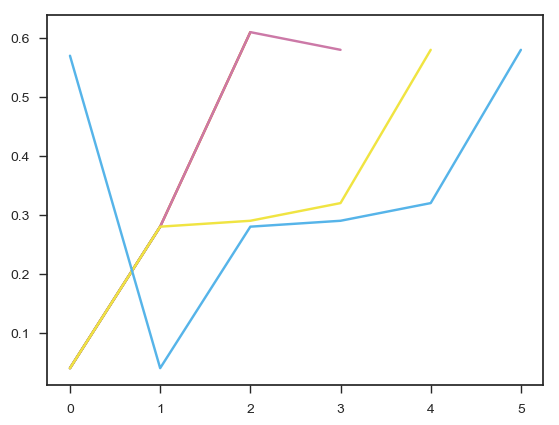

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a3b548e48>

In [33]:
plot(diff(sort(fpeaks2/muHz)))
plot(diff(sort(fpeaks3/muHz)))
plot(diff(sort(fpeaks4/muHz)))
plot(diff(sort(fpeaks5/muHz)))
plot(diff(sort(fpeaks6/muHz)))
plot(diff(sort(fpeaks7/muHz)))

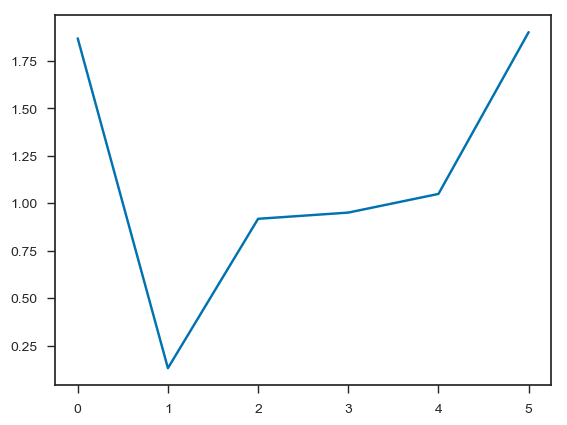

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a38d42080>

In [34]:
f0 = median(diff(sort(fpeaks7)))
plot(diff(sort(fpeaks7))/f0)